#### Case Study: This dataset has funding information of the Indian startups from January 2015 to August 2017.

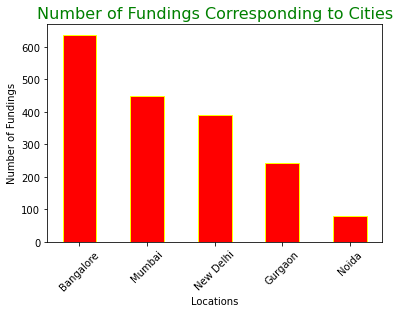

Bangalore 637
Mumbai 449
New Delhi 389
Gurgaon 241
Noida 79
The location at which the most number of funding is done is  Bangalore


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
startup = pd.read_csv("startup_funding.csv")
df = startup.copy()  

df.dropna(subset = ["CityLocation"],inplace = True)
df["CityLocation"].replace("bangalore","Bangalore",inplace = True)
df["CityLocation"].replace("Delhi","New Delhi",inplace = True)

d1 = {}

for i in df["CityLocation"]:
    if "Bangalore" in i:
        d1["Bangalore"] = d1.get("Bangalore",0) + 1  
    elif "Mumbai" in i:
        d1["Mumbai"] = d1.get("Mumbai",0) + 1
    elif "New Delhi" in i:
        d1["New Delhi"] = d1.get("New Delhi",0) + 1
    elif "Noida" in i:
        d1["Noida"] = d1.get("Noida",0) + 1
    elif "Gurgaon" in i:
        d1["Gurgaon"] = d1.get("Gurgaon",0) + 1
cities = sorted(d1, key=d1.get , reverse=True)
fundings = []  

for i in cities: 
    fundings.append(d1[i])

plt.bar(cities,fundings,width = 0.5,color = "red" , edgecolor = "yellow")
plt.title("Number of Fundings Corresponding to Cities", fontsize = 16, color = 'green')
plt.xlabel("Locations")
plt.ylabel("Number of Fundings")
plt.xticks(rotation = 45)
plt.show()
for i in range(5):
    print(cities[i], fundings[i])
print("The location at which the most number of funding is done is " , cities[0])

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
startup = pd.read_csv("startup_funding.csv")
df = startup.copy()

df.dropna(subset = ["InvestorsName"],inplace = True)

d = {}
for i in df["InvestorsName"].values:
    if "," in i:
        for j in i.strip().split(','):
            d[j.strip()] = d.get(j.strip(),0) + 1
    else:
        d[i.strip()] = d.get(i.strip(),0) + 1
d1 = sorted(d, key=d.get , reverse=True)[0:5] 
for i in d1:
    print(i)

Sequoia Capital
Accel Partners
Kalaari Capital
SAIF Partners
Indian Angel Network


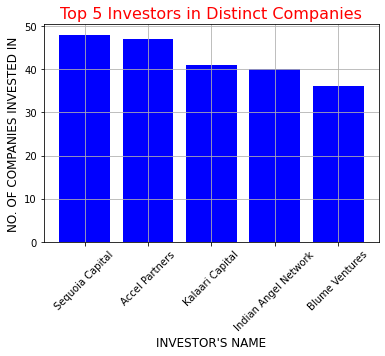

Sequoia Capital 48
Accel Partners 47
Kalaari Capital 41
Indian Angel Network 40
Blume Ventures 36


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

file_obj = open("startup_funding.csv")
file_data = csv.DictReader(file_obj, skipinitialspace = True)

d = {}

for row in file_data:
    if row["StartupName"] == "Ola Cabs" or row["StartupName"] == "Olacabs":
        row["StartupName"] = "Ola"
    if row["StartupName"] == "Flipkart.com":
        row["StartupName"] = "Flipkart"
    if row["StartupName"] == "Oyo Rooms" or row["StartupName"] == "OyoRooms" or row["StartupName"] == "Oyorooms" or row["StartupName"] == "OYO Rooms":
        row["StartupName"] = "Oyo"
    if row["StartupName"] == "Paytm Marketplace":
        row["StartupName"] = "Paytm"
        
    value = row["InvestorsName"].split(",")
    for i in range(len(value)):
        value[i] = value[i].strip()
        
    for i in value:
        if(row["StartupName"] != None) and i != "" and i != "Undisclosed Investors" and i != "Undisclosed investors" :
            if i in d:
                d[i].add(row["StartupName"])
            else:
                d[i] = set()
                d[i].add(row["StartupName"])

for i in d.keys():
    d[i] = len(d[i])
d1 = sorted(d, key = d.get, reverse = True)

investors = d1[0:5]
num_of_companies = []

top_10_investors = d1[0:10]
number = []

for i in top_10_investors:
    number.append(d[i])

for i in investors:
    num_of_companies.append(d[i])
    
plt.bar(investors, num_of_companies, color = 'blue')
plt.title("Top 5 Investors in Distinct Companies", fontsize = 16, color = 'red')
plt.xlabel("INVESTOR'S NAME",fontsize = 12)
plt.ylabel("NO. OF COMPANIES INVESTED IN",fontsize = 12)
plt.xticks(rotation = 45)
plt.grid()
plt.show()

for i in investors:
    print(i,d[i])

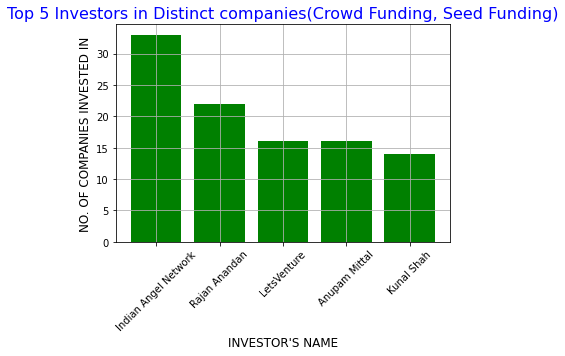

Indian Angel Network 33
Rajan Anandan 22
LetsVenture 16
Anupam Mittal 16
Kunal Shah 14


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

file_obj = open("startup_funding.csv")
file_data = csv.DictReader(file_obj, skipinitialspace = True)

d = {}

for row in file_data:
    if row["StartupName"] == "Ola Cabs" or row["StartupName"] == "Olacabs":
        row["StartupName"] = "Ola"
    if row["StartupName"] == "Flipkart.com":
        row["StartupName"] = "Flipkart"
    if row["StartupName"] == "Oyo Rooms" or row["StartupName"] == "OyoRooms" or row["StartupName"] == "Oyorooms" or row["StartupName"] == "OYO Rooms":
        row["StartupName"] = "Oyo"
    if row["StartupName"] == "Paytm Marketplace":
        row["StartupName"] = "Paytm"
    
    if row["InvestmentType"]  == "SeedFunding":
        row["InvestmentType"] = "Seed Funding"
    if row["InvestmentType"]  == "Crowd funding":
        row["InvestmentType"] = "Crowd Funding"
    
    value = row["InvestorsName"].split(",")
    for i in range(len(value)):
        value[i] = value[i].strip()
    for i in value:
        if(row["StartupName"] != None) and i != "" and i != "Undisclosed Investors" and i != "Undisclosed investors" and (row["InvestmentType"] == "Seed Funding" 
            or row["InvestmentType"] == "Crowd Funding") :
            if i in d:
                d[i].add(row["StartupName"])
            else:
                d[i] = set()
                d[i].add(row["StartupName"])

for i in d.keys():
    d[i] = len(d[i])
    
d1 = sorted(d, key = d.get, reverse = True)

investors = d1[0:5]
num_of_companies = []

top_10_investors = d1[0:10]
number = []

for i in top_10_investors:
    number.append(d[i])

for i in investors:
    num_of_companies.append(d[i])
    
plt.bar(investors, num_of_companies, color = 'green')
plt.title("Top 5 Investors in Distinct companies(Crowd Funding, Seed Funding)", fontsize = 16, color = 'blue')
plt.xlabel("INVESTOR'S NAME",fontsize = 12)
plt.ylabel("NO. OF COMPANIES INVESTED IN",fontsize = 12)
plt.xticks(rotation = 45)
plt.grid()
plt.show()

for i in investors:
    print(i,d[i])

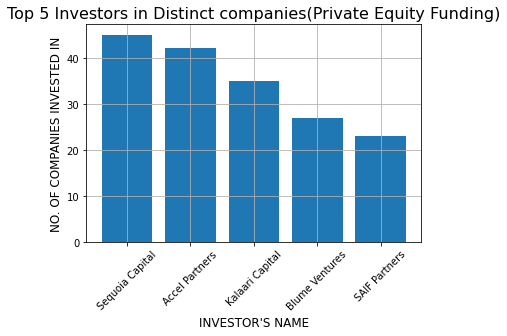

Sequoia Capital 45
Accel Partners 42
Kalaari Capital 35
Blume Ventures 27
SAIF Partners 23


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

file_obj = open("startup_funding.csv")
file_data = csv.DictReader(file_obj, skipinitialspace = True)

d = {}

for row in file_data:
    if row["StartupName"] == "Ola Cabs" or row["StartupName"] == "Olacabs":
        row["StartupName"] = "Ola"
    if row["StartupName"] == "Flipkart.com":
        row["StartupName"] = "Flipkart"
    if row["StartupName"] == "Oyo Rooms" or row["StartupName"] == "OyoRooms" or row["StartupName"] == "Oyorooms" or row["StartupName"] == "OYO Rooms":
        row["StartupName"] = "Oyo"
    if row["StartupName"] == "Paytm Marketplace":
        row["StartupName"] = "Paytm"
    
    if row["InvestmentType"]  == "PrivateEquity":
        row["InvestmentType"] = "Private Equity"

    
    value = row["InvestorsName"].split(",")
    for i in range(len(value)):
        value[i] = value[i].strip()
    for i in value:
        if(row["StartupName"] != None) and i != "" and i != "Undisclosed Investors" and i != "Undisclosed investors" and (row["InvestmentType"] == "Private Equity" ) :
            if i in d:
                d[i].add(row["StartupName"])
            else:
                d[i] = set()
                d[i].add(row["StartupName"])

for i in d.keys():
    d[i] = len(d[i])
    
d1 = sorted(d, key = d.get, reverse = True)

investors = d1[0:5]
num_of_companies = []

top_10_investors = d1[0:10]
number = []

for i in top_10_investors:
    number.append(d[i])

for i in investors:
    num_of_companies.append(d[i])
    
plt.bar(investors, num_of_companies)
plt.title("Top 5 Investors in Distinct companies(Private Equity Funding)", fontsize = 16)
plt.xlabel("INVESTOR'S NAME",fontsize = 12)
plt.ylabel("NO. OF COMPANIES INVESTED IN",fontsize = 12)
plt.xticks(rotation = 45)
plt.grid()
plt.show()

for i in investors:
    print(i,d[i])